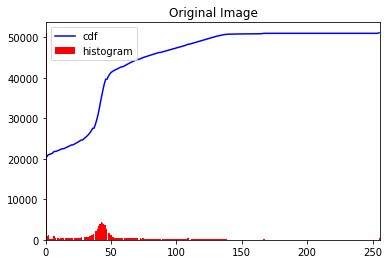

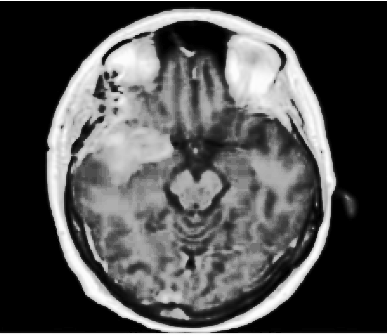

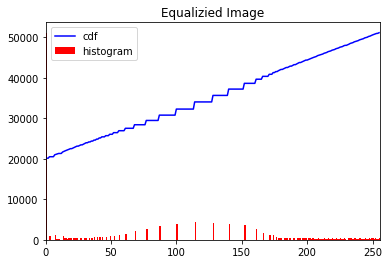

In [6]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Load the image in greyscale
img = cv2.imread('Q1.png',0)
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Original Image')
plt.show()

equ = cv.equalizeHist(img)
cv2_imshow(equ)

hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Equalizied Image')
plt.show()


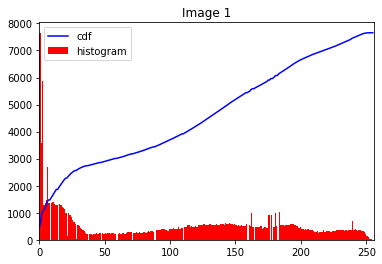

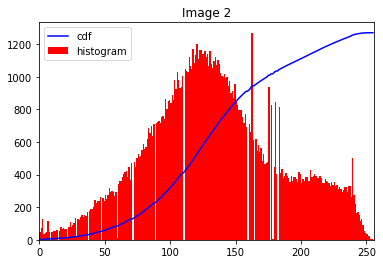

In [6]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
img1 = cv.imread('Q2.png',0)
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Image 1')
plt.show()

img2 = cv.imread('Q3.png',0)

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Image 2')
plt.show()

# Q2.1

In [25]:
def derivative(I, mode):
  #coloured_image = cv2.imread(image_path)
  #grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
  if mode=='centeral':
    K = np.array([[-1,0,1]])
  elif mode=='forward':
    K = np.array([[0,-1,1]])
  elif mode=='backward':
    K = np.array([[-1,1,0]])
    
  Fx = np.zeros_like(I)
  Fy = np.zeros_like(I)
  
  # Add zero padding to the input image
  I_x = np.zeros((I.shape[0], I.shape[1]+2))
  I_x[:, 1:-1] = I
  
  I_y = np.zeros((I.shape[0] + 2, I.shape[1]))
  I_y[1:-1, :] = I

  # Loop over every pixel of the image
  for x in range(I.shape[0]):
    for y in range(I.shape[1]):
      # element-wise multiplication of the kernel and the image
      Fx[x, y] = (K * I_x[x, y: y+3]).sum()
      Fy[x, y] = (K * I_y[x:x+3, y]).sum()
  
  dI = np.sqrt(Fx**2 + Fy**2) 
  return abs(Fx), abs(Fy), dI


Text(0.5, 1.0, 'Backward difference: sqrt(Fy^2+Fx^2)')

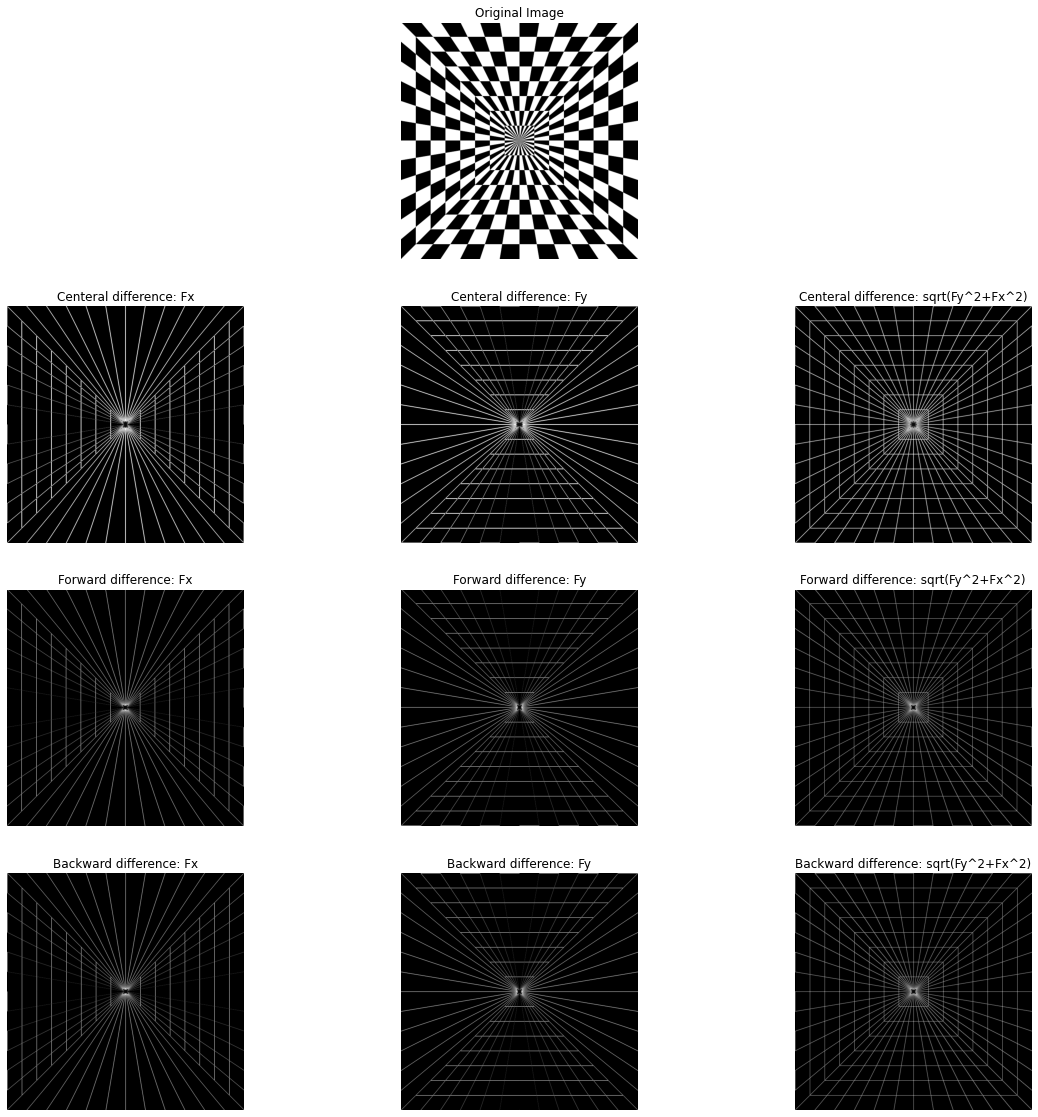

In [26]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
  
I = cv2.imread('q1.png', 0).astype(np.float64)

Fx1, Fy1, dI1 = derivative(I, 'centeral')

Fx2, Fy2, dI2 = derivative(I, 'forward')

Fx3, Fy3, dI3 = derivative(I, 'backward')

# create figure
fig = plt.figure(figsize=(20, 20))


fig.add_subplot(4,3,2)
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.title("Original Image")
  

fig.add_subplot(4,3,4)
plt.imshow(Fx1, cmap='gray')
plt.axis('off')
plt.title("Centeral difference: Fx")

fig.add_subplot(4,3,5)
plt.imshow(Fy1, cmap='gray')
plt.axis('off')
plt.title("Centeral difference: Fy")

fig.add_subplot(4,3,6)
plt.imshow(dI1, cmap='gray')
plt.axis('off')
plt.title("Centeral difference: sqrt(Fy^2+Fx^2)")

fig.add_subplot(4,3,7)
plt.imshow(Fx2, cmap='gray')
plt.axis('off')
plt.title("Forward difference: Fx")

fig.add_subplot(4,3,8)
plt.imshow(Fy2, cmap='gray')
plt.axis('off')
plt.title("Forward difference: Fy")

fig.add_subplot(4,3,9)
plt.imshow(dI2, cmap='gray')
plt.axis('off')
plt.title("Forward difference: sqrt(Fy^2+Fx^2)")


fig.add_subplot(4,3,10)
plt.imshow(Fx3, cmap='gray')
plt.axis('off')
plt.title("Backward difference: Fx")

fig.add_subplot(4,3,11)
plt.imshow(Fy3, cmap='gray')
plt.axis('off')
plt.title("Backward difference: Fy")

fig.add_subplot(4,3,12)
plt.imshow(dI3, cmap='gray')
plt.axis('off')
plt.title("Backward difference: sqrt(Fy^2+Fx^2)")

#Q2.2

In [27]:
import numpy as np
import cv2
def SNR(x,y):
  n = np.sum(np.power(x,2))
  d = np.sum(np.power((x-y),2))
  snr = 10*np.log10(n/d)
  return snr

In [28]:
x = cv2.imread('city_orig.jpg', 0).astype(np.float64)
x_noisy = cv2.imread('city_noise.jpg', 0).astype(np.float64)
n = int(x.shape[0]/2)
m = int(x.shape[1]/2)
I_origin = np.zeros((n,m,4))
I_noisy = np.zeros((n,m,4))
k = 0
for i in range(2):
  for j in range(2):
    I_origin[:,:,k] = x[i*n:(i+1)*n,j*m:(j+1)*m]
    I_noisy[:,:,k] = x_noisy[i*n:(i+1)*n,j*m:(j+1)*m]
    k = k+1

snr_noisy = np.zeros((1,4))

for i in range(4):
  snr_noisy[0][i] = SNR(I_origin[:,:,i],I_noisy[:,:,i])

print(snr_noisy[0,:])

[11.99520655 48.91512444  3.25494618  4.13247843]


Text(0.5, 1.0, 'Output image result from Mean filter')

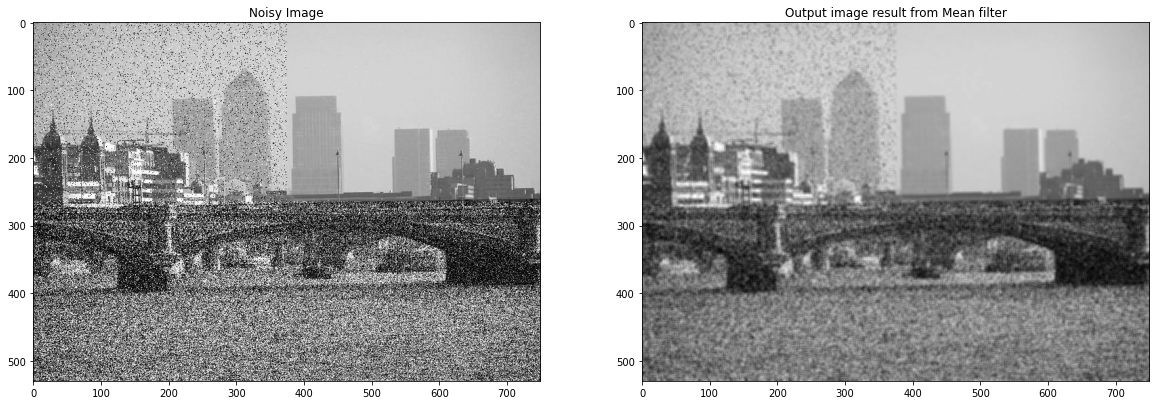

In [29]:
# mean filter
kernel_size = 5
mean_x = cv2.blur(x_noisy,(kernel_size, kernel_size))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(x_noisy,cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(mean_x,cmap='gray')
plt.title('Output image result from Mean filter')



Text(0.5, 1.0, 'Output image result from Gaussian filter')

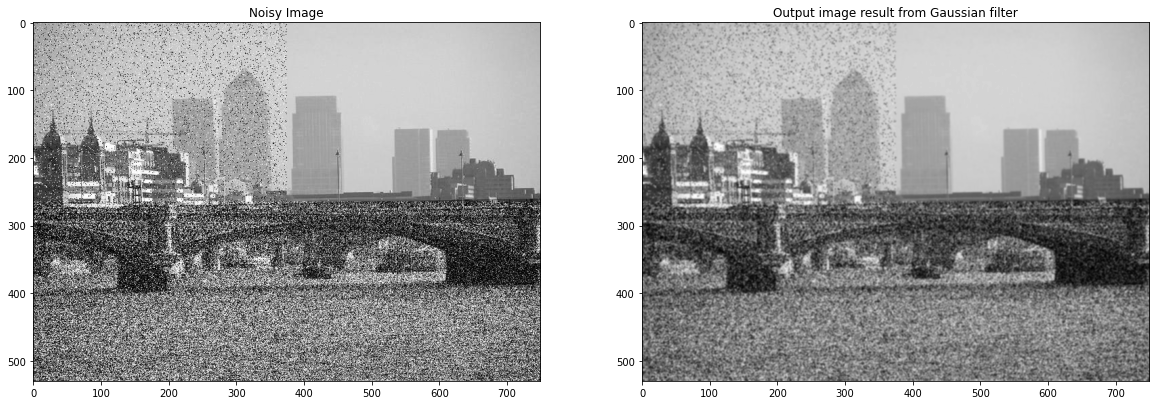

In [30]:
# Guassian Filter
kernel_size = 5
gaussian_x = cv2.GaussianBlur(x_noisy, (kernel_size, kernel_size),0)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(x_noisy,cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(gaussian_x,cmap='gray')
plt.title('Output image result from Gaussian filter')

Text(0.5, 1.0, 'Output image result from Median filter')

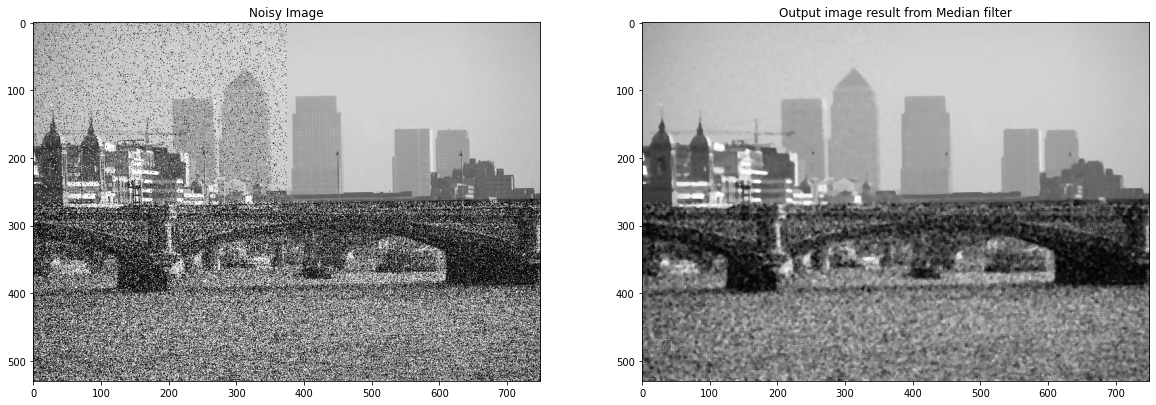

In [31]:
kernel_size = 5
x_noisy = x_noisy.astype('float32')
median_x = cv2.medianBlur(x_noisy, kernel_size)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(x_noisy,cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(median_x,cmap='gray')
plt.title('Output image result from Median filter')

In [ ]:
I_denoised_mean = np.zeros((n,m,4))
I_denoised_gaussian = np.zeros((n,m,4))
I_denoised_median = np.zeros((n,m,4))
k = 0
for i in range(2):
  for j in range(2):
    I_denoised_mean[:,:,k] = mean_x[i*n:(i+1)*n,j*m:(j+1)*m]
    I_denoised_gaussian[:,:,k] = gaussian_x[i*n:(i+1)*n,j*m:(j+1)*m]
    I_denoised_median[:,:,k] = median_x[i*n:(i+1)*n,j*m:(j+1)*m]
    k = k+1


snr_denoised_mean = np.zeros((1,4))
snr_denoised_gaussian = np.zeros((1,4))
snr_denoised_median = np.zeros((1,4))

for i in range(4):
  snr_denoised_mean[0][i] = SNR(I_origin[:,:,i],I_denoised_mean[:,:,i])
  snr_denoised_gaussian[0][i] = SNR(I_origin[:,:,i],I_denoised_gaussian[:,:,i])
  snr_denoised_median[0][i] = SNR(I_origin[:,:,i],I_denoised_median[:,:,i])

print(snr_denoised_mean[0,:])
print(snr_denoised_gaussian[0,:])
print(snr_denoised_median[0,:])

[19.65506866 30.43271106 11.65342251 12.59962142]
[20.24660297 32.74472342 11.76685344 12.76521302]
[22.20562903 31.22935029 11.71575906 12.49931048]


In [32]:
import pandas as pd
data = [snr_noisy[0,:],snr_denoised_mean[0,:], 
        snr_denoised_median[0,:],snr_denoised_gaussian[0,:]]

df = pd.DataFrame(data, columns=['First Part: Salt & paper noise','Second Part: Without noise', 'Third Part: Both types of Noise',
                                 'Forth Part: Gaussian noise'], index=['SNR befor apply filter',
                               'SNR after apply Mean filter',
                               'SNR after apply Median filter',
                              'SNR after apply Gaussian filter'])

display(df)

First Part: Salt & paper noise  \
SNR befor apply filter                                11.995207   
SNR after apply Mean filter                           19.817272   
SNR after apply Median filter                         22.205629   
SNR after apply Gaussian filter                       20.246603   

                                 Second Part: Without noise  \
SNR befor apply filter                            48.915124   
SNR after apply Mean filter                       29.996667   
SNR after apply Median filter                     31.229350   
SNR after apply Gaussian filter                   32.744723   

                                 Third Part: Both types of Noise  \
SNR befor apply filter                                  3.254946   
SNR after apply Mean filter                            12.059074   
SNR after apply Median filter                          11.715759   
SNR after apply Gaussian filter                        11.766853   

                                 Forth Part: Gaussian noise  
SNR befor apply filter                             4.132478  
SNR after apply Mean filter                       13.070151  
SNR after apply Median filter                     12.499310  
SNR after apply Gaussian filter                   12.765213

#Q3

Text(0.5, 1.0, 'Original Image')

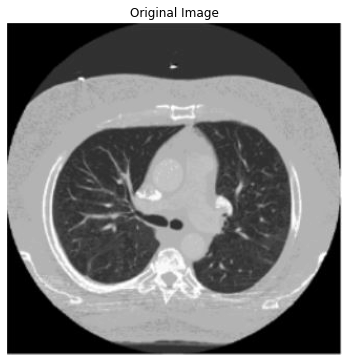

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('q3_1.JPG',0)

# display the image
fig = plt.figure(figsize=(6, 8))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

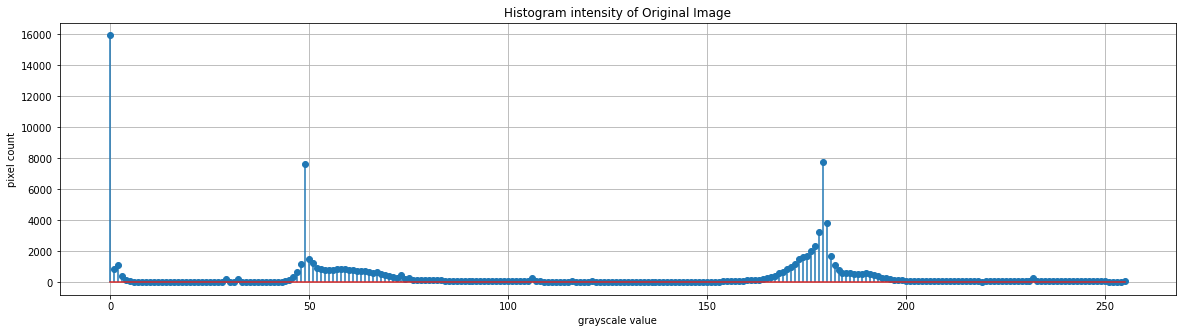

In [17]:
bins = np.zeros(256,np.int32)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    intensity = img[i][j]
    bins[intensity] +=1


fig = plt.figure(figsize=(20, 5))
plt.stem(np.arange(256),bins)
plt.grid('on')
plt.title("Histogram intensity of Original Image")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.savefig("q3res1.jpg")

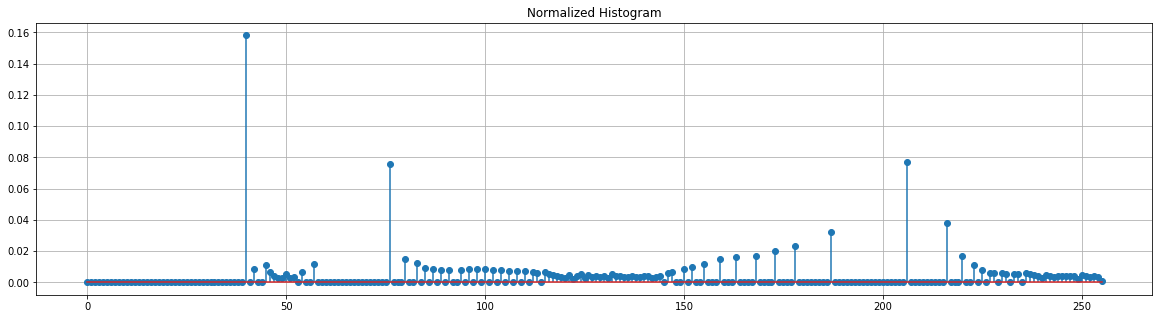

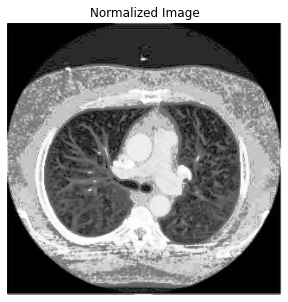

In [18]:
def get_histogram(img):
  #calculate the normalized histogram of an image
  h, w = img.shape
  hist = [0.0] * 256
  for i in range(h):
    for j in range(w):
      hist[img[i, j]]+=1
  return np.array(hist)/(h*w)

def get_cumulative_sums(hist):
  #find the cumulative sum of a numpy array
  return [sum(hist[:i+1]) for i in range(len(hist))]

def normalize_histogram(img):

  hist = get_histogram(img)
  cdf = np.array(get_cumulative_sums(hist))
  sk = np.uint8(255 * cdf)
  h, w = img.shape
  img_new = np.zeros_like(img)
  for i in range(0, h):
    for j in range(0, w):
      img_new[i, j] = sk[img[i, j]]

  hist_new = get_histogram(img_new)
  return img_new, hist_new

img_normalized, hist_normalized = normalize_histogram(img)

fig = plt.figure(figsize=(20, 5))
plt.stem(hist_normalized)
plt.grid('on')
plt.title("Normalized Histogram")
plt.savefig('q3res3.jpg')

fig = plt.figure(figsize=(20, 5))
plt.imshow(img_normalized,cmap = 'gray')
plt.axis('off')
plt.title("Normalized Image")
plt.savefig('q3res2.jpg')

# Q3(optional)

In [14]:

def get_cumulative_sums(hist):
  #find the cumulative sum of a numpy array
  return [sum(hist[:i+1]) for i in range(len(hist))]

def hist_matching(original_img, target_img):
  hist = get_histogram(original_img)
  c = np.array(get_cumulative_sums(hist))

  hist = get_histogram(target_img)
  target_c = np.array(get_cumulative_sums(hist))
  
  b = np.interp(c, target_c, np.arange(256))
  
  pix_repl = {i:b[i] for i in range(256)} 
  mp = np.arange(0,256)
  for (k, v) in pix_repl.items():
    mp[k] = v
  s = original_img.shape
  original_img = np.reshape(mp[original_img.ravel()], original_img.shape)
  original_img = np.reshape(original_img, s)
  return original_img


def get_histogram(img):
  #calculate the normalized histogram of an image
  h, w = img.shape
  hist = [0.0] * 256
  for i in range(h):
    for j in range(w):
      hist[img[i, j]]+=1
  return np.array(hist)/(h*w)


def get_histogramOfRGB(img):
  #calculate the normalized histogram of an image
  hist = []
  for i in range(3):
    hist.append(get_histogram(img[:,:,i]))

  return hist

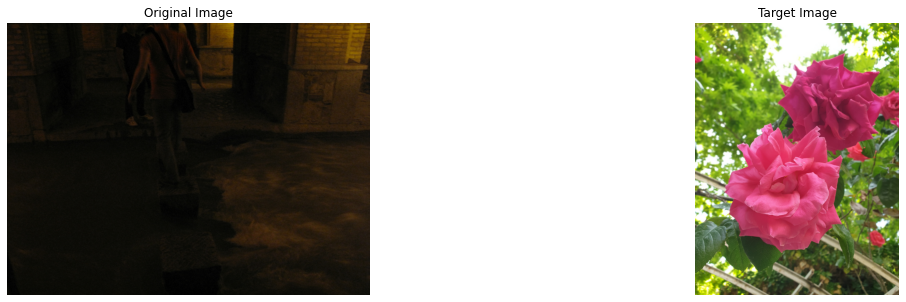

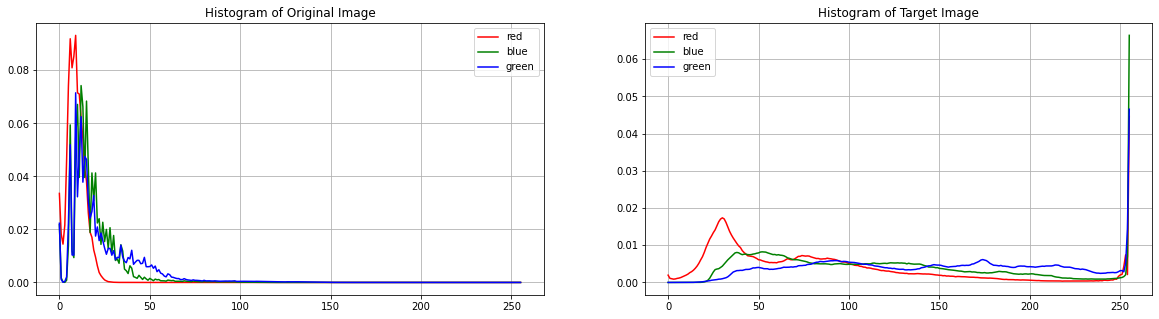

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
original_img = cv2.imread('q3_2.jpg')
target_img = cv2.imread('q3_3.jpg')

fig = plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Target Image')


original_hist = get_histogramOfRGB(original_img)
fig = plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(original_hist[0],'r')
plt.plot(original_hist[1],'g')
plt.plot(original_hist[2],'b')
plt.title('Histogram of Original Image')
plt.grid('on')
plt.legend(['red','blue','green'])
plt.savefig('oq3res1.jpg')

target_hist = get_histogramOfRGB(target_img)
plt.subplot(122)
plt.plot(target_hist[0],'r')
plt.plot(target_hist[1],'g')
plt.plot(target_hist[2],'b')
plt.title('Histogram of Target Image')
plt.grid('on')
plt.legend(['red','blue','green'])
plt.savefig('oq3res2.jpg')

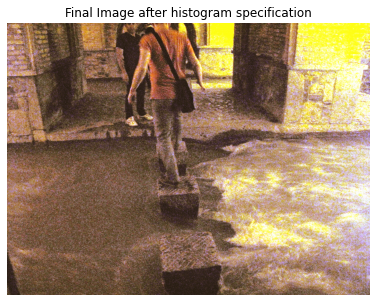

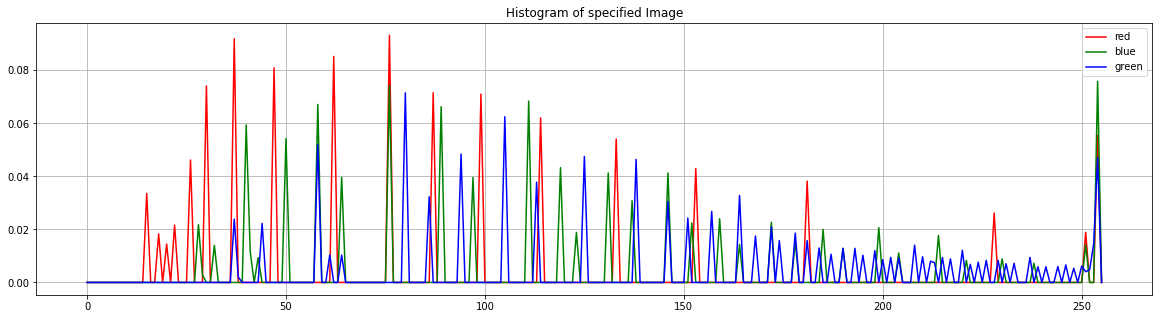

In [15]:
spe_img = np.zeros_like(original_img)
for i in range(3):
  spe_img[:,:,i]  = hist_matching(original_img[:,:,i], target_img[:,:,i])

fig = plt.figure(figsize=(20, 5))
plt.imshow(cv2.cvtColor(spe_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Final Image after histogram specification')
plt.savefig('oq3res3.jpg')

spe_hist = get_histogramOfRGB(spe_img)

fig = plt.figure(figsize=(20, 5))
plt.plot(spe_hist[0],'r')
plt.plot(spe_hist[1],'g')
plt.plot(spe_hist[2],'b')
plt.title('Histogram of specified Image')
plt.grid('on')
plt.legend(['red','blue','green'])
plt.savefig('oq3res4.jpg')

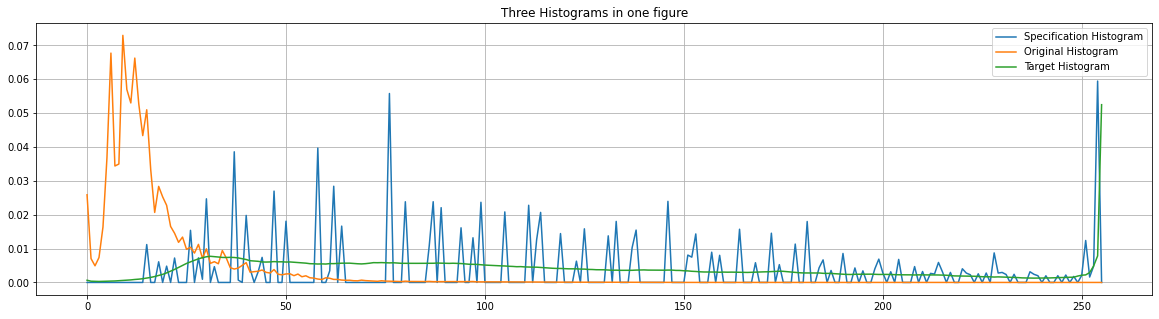

In [16]:
fig = plt.figure(figsize=(20, 5))
plt.plot((spe_hist[0]+spe_hist[1]+spe_hist[2])/3)
plt.plot((original_hist[0]+original_hist[1]+original_hist[2])/3)
plt.plot((target_hist[0]+target_hist[1]+target_hist[2])/3)
plt.title('Three Histograms in one figure')
plt.grid('on')
plt.legend(['Specification Histogram','Original Histogram','Target Histogram'])

# Q4

a) show average image and create data matrix

Text(0.5, 1.0, 'Average Image')

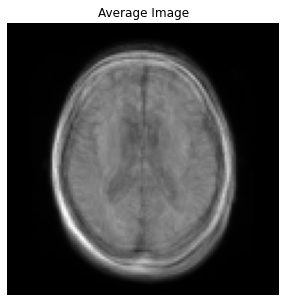

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Xp = []
img_average = 0
Cx = 0
Cy = 0
d = 120
for i in range(1,16):
  img = cv2.imread(str(i)+".jpg",0).astype(np.float64)
  I = img[Cx:240-Cx, Cy:240-Cy]
  I = cv2.resize(I,(d,d))
  img_average = img_average+I
  I = I.flatten()
  Xp.append(I)

img_average = img_average/15
fig = plt.figure(figsize=(20, 5))
plt.imshow(img_average,cmap='gray')
plt.axis('off')
plt.title('Average Image')

In [ ]:
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

Xp = np.array(Xp).reshape(15,d*d)
Xp = StandardScaler().fit_transform(Xp)

cov_matrix = np.cov(Xp.T)
print(cov_matrix.shape)
egnvalues, egnvectors = eigh(cov_matrix)

index  = np.argsort(-egnvalues)
egnvalues = egnvalues[index]
egnvectors = egnvectors[:, index]


(14400, 14400)


In [ ]:
p = 250
P = egnvectors[0:p]
projectedMatrix = P.T @ P
Xre= Xp@projectedMatrix

Text(0.5, 1.0, 'recovered data')

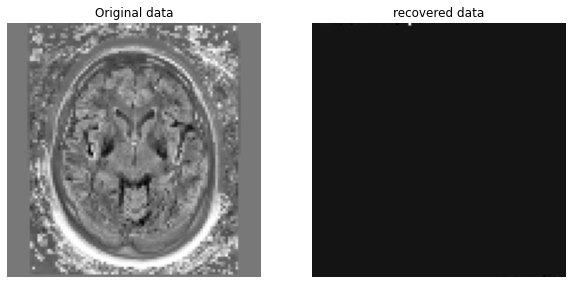

In [ ]:
fig = plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(Xp[0].reshape(d,d),cmap='gray')
plt.axis("off")
plt.title("Original data")


plt.subplot(1,2,2)
plt.imshow(Xre[0].reshape(d,d),cmap='gray')
plt.axis("off")
plt.title("recovered data")

# Q5

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv2.imread("q5.png")

Text(0.5, 1.0, 'Blue dimension of image')

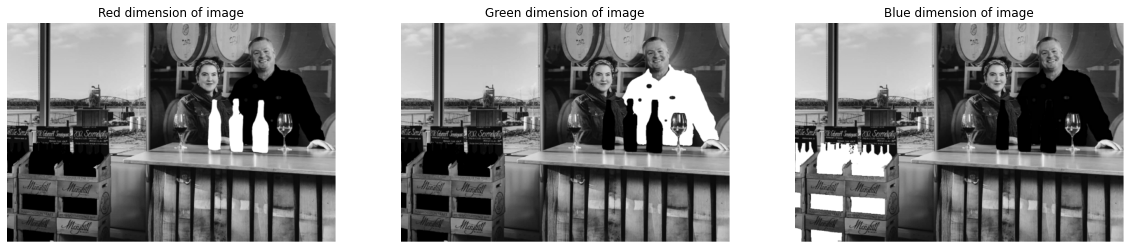

In [2]:
fig = plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img[:,:,2],cmap='gray')
#plt.imshow(cv2.cvtColor(img[:,:,0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Red dimension of image")

plt.subplot(1,3,2)
plt.imshow(img[:,:,1],cmap='gray')
plt.axis("off")
plt.title("Green dimension of image")

plt.subplot(1,3,3)
plt.imshow(img[:,:,0],cmap='gray')
plt.axis("off")
plt.title("Blue dimension of image")

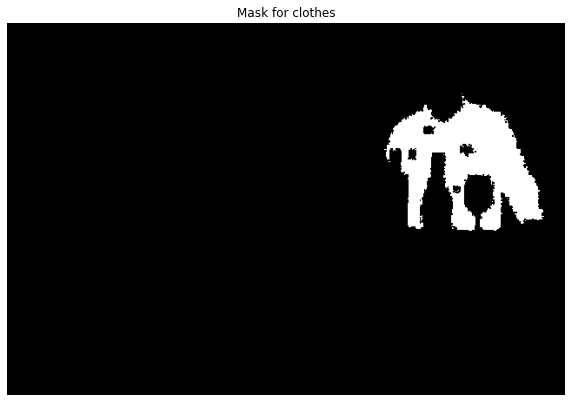

In [3]:
mask = np.zeros_like(img[:,:,1],dtype=np.uint8)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j,1]==255:
      mask[i,j] = 255

fig = plt.figure(figsize=(10,10))
plt.imshow(mask,cmap='gray')
plt.axis("off")
plt.title("Mask for clothes")
plt.savefig('q5res01.jpg')

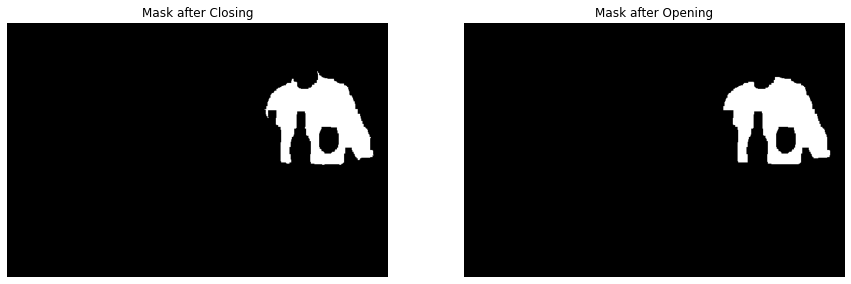

In [5]:
def ero(img, k):
  m,n= img.shape
  SE= np.ones((k,k))
  constant= math.floor(k//2)
  imgErode= np.zeros((m,n),dtype=np.uint8)
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= img[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgErode[i,j]= np.min(product)
  return imgErode

def dil(img, k):
  m,n= img.shape
  SE= np.ones((k,k))
  constant= math.floor(k//2)
  imgDilate= np.zeros((m,n),dtype=np.uint8)
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= img[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgDilate[i,j]= np.max(product)
  return imgDilate

def closing(img, k):
  return ero(dil(img, k), k)

def opening(img, k):
  return dil(ero(img, k), k)

c_mask = closing(mask, 11)
o_mask = opening(c_mask, 7)


fig = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(c_mask,cmap='gray')
plt.axis("off")
plt.title("Mask after Closing")

plt.subplot(1,2,2)
plt.imshow(o_mask,cmap='gray')
plt.axis("off")
plt.title("Mask after Opening")
plt.savefig('q5res02.jpg')


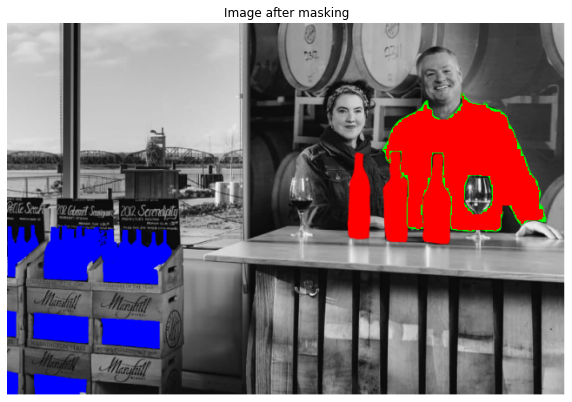

In [8]:
masked_img = img
for i in range(c_mask.shape[0]):
  for j in range(c_mask.shape[1]):
    if(c_mask[i,j]==255):
      masked_img[i,j,0] = 0
      masked_img[i,j,1] = 0
      masked_img[i,j,2] = 255

fig = plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Image after masking")
plt.savefig('q5res03.jpg')